In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("Advertising.csv")
print(df.info)
print(df.columns)

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [3]:
df.head

print(df.isnull().sum())
df = df.dropna()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [5]:
X = df[['Radio']]
y = df['Sales']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print("Coefficient (slope) :", model.coef_[0])
print("Intercept :", model.intercept_)

Coefficient (slope) : 0.20107414206738045
Intercept : 9.410447848614504


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

RSS = np.sum((y_test - y_pred)**2)
print("Residual sum of squares :", RSS)

r2 = r2_score(y_test, y_pred)
print("Coeff of determination :", r2)

Residual sum of squares : 469.96223969695774
Coeff of determination : 0.28467313450678


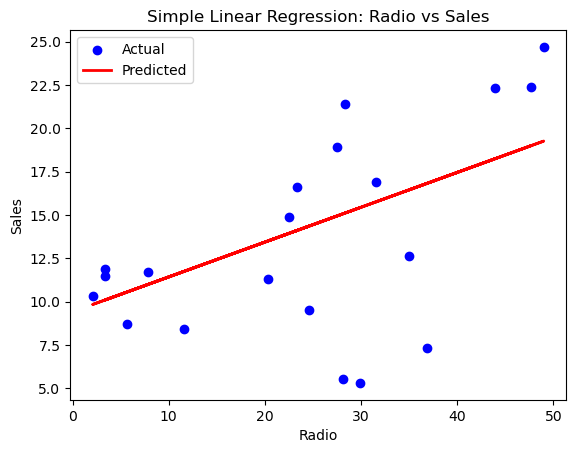

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Simple Linear Regression: Radio vs Sales')
plt.legend()
plt.show()
